In [2]:
import opendota
import pandas as pd
import numpy as np
import requests as r

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
client = opendota.OpenDota()

In [35]:
old_match_id = 2562582896 # works
new_match_id = 6801805543 # not work
liq_ta_game3_id = 6819203954 # works

In [36]:
a = client.get_match(6819203954)

In [37]:
wards_track = a['players'][0]['obs_log']
df = pd.DataFrame.from_dict(wards_track)
df = df[['time', 'x','y']]


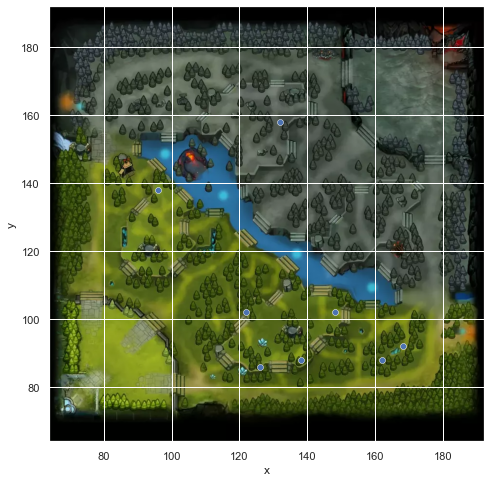

In [38]:
minimap = plt.imread('minimap.png')
fig, ax = plt.subplots()
ax.imshow(minimap, extent = [64, 192, 64, 192]) # log limits are 64 to 192
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.scatterplot(x = 'x', y ='y', data = df)

In [39]:
x_vals = []
y_vals = []
for keys, values in a['players'][0]['lane_pos'].items():
    for key2, vals2 in values.items():
        x_vals.append(int(key2))
        y_vals.append(int(vals2))
len(a['players'][0]['lane_pos'])

53

In [1]:
# pd.DataFrame(a['players'][0]['lane_pos']) # creates dataframe of x (row index) and y (column headers) and values are intensity values

In [ ]:
def clean_players(df_players):
    df_players.loc[:, 'player_slot'] = df_players['player_slot'].apply(lambda x: 'radiant' if x < 5 else 'dire')

In [63]:
players = pd.DataFrame(a['players'])
players.loc[:, 'player_slot'] = players['player_slot'].apply(lambda x: 'radiant' if x < 5 else 'dire')
players[['name','lane_role','player_slot', 'gold_t']]

,name,lane_role,player_slot,gold_t
0,Matthew,1,radiant,"[0, 130, 220, 357, 542, 672, 762, 937, 1061, 1..."
1,Sacred,3,radiant,"[0, 130, 549, 798, 1205, 1512, 1762, 2468, 275..."
2,DarkMago♡,2,radiant,"[0, 206, 623, 914, 1355, 1756, 2267, 2856, 325..."
3,Panda,3,radiant,"[0, 130, 220, 310, 400, 530, 658, 920, 1173, 1..."
4,Pakazs,1,radiant,"[0, 213, 410, 648, 1062, 1350, 1690, 2026, 242..."
5,Insania,1,dire,"[0, 229, 338, 491, 623, 775, 1039, 1174, 1360,..."
6,zai,3,dire,"[0, 247, 599, 834, 1386, 1940, 2384, 2942, 316..."
7,m1CKe,2,dire,"[0, 362, 704, 1004, 1411, 1947, 2322, 2576, 30..."
8,Boxi,3,dire,"[0, 210, 300, 463, 836, 1008, 1098, 1548, 1683..."
9,MATUMBAMAN,1,dire,"[0, 248, 527, 835, 1001, 1420, 1811, 2293, 256..."
